In [72]:
%pip install kagglehub
%pip install wordcloud 
%pip install textblob

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [73]:
import os

os.environ['KAGGLE_USERNAME'] = ''
os.environ['KAGGLE_KEY'] = ''

# Download all Datasets from Kaggle

- https://www.kaggle.com/datasets/hadasu92/cnn-articles-after-basic-cleaning
- https://www.kaggle.com/datasets/rajneesh231/lex-fridman-podcast-transcript
- https://www.kaggle.com/datasets/rounakbanik/ted-talks

In [74]:
# Download all of the datasets from kaggle 
import kagglehub

# Download latest version
podcast_path = kagglehub.dataset_download("rajneesh231/lex-fridman-podcast-transcript")
print("Path to podcast dataset files:", podcast_path)

# We may include other datasets in the future
# ted_talk_path = kagglehub.dataset_download("rounakbanik/ted-talks")
# cnn_path = kagglehub.dataset_download("hadasu92/cnn-articles-after-basic-cleaning")

# print("Path to ted talk dataset files:", ted_talk_path)
# print("Path to cnn dataset files:", cnn_path)

Path to podcast dataset files: /Users/pparks/.cache/kagglehub/datasets/rajneesh231/lex-fridman-podcast-transcript/versions/2


In [75]:
# Check the files in the directory

print("Podcast Files:")
print(os.listdir(podcast_path))

# print("TED Talk Files:")
# print(os.listdir(ted_talk_path))

# print("CNN Files:")
# print(os.listdir(cnn_path))
# print(os.listdir(cnn_path + "/CNN_Articels_clean"))
# print(os.listdir(cnn_path + "/CNN_Articels_clean_2"))

Podcast Files:
['podcastdata_dataset.csv']


In [76]:
import pandas as pd

podcast_df = pd.read_csv(podcast_path + "/podcastdata_dataset.csv")
podcast_df.head()

,id,guest,title,text
0,1,Max Tegmark,Life 3.0,"As part of MIT course 6S099, Artificial Genera..."
1,2,Christof Koch,Consciousness,As part of MIT course 6S099 on artificial gene...
2,3,Steven Pinker,AI in the Age of Reason,"You've studied the human mind, cognition, lang..."
3,4,Yoshua Bengio,Deep Learning,What difference between biological neural netw...
4,5,Vladimir Vapnik,Statistical Learning,The following is a conversation with Vladimir ...


In [77]:
# print the shape of the dataframes
print("Podcast Dataframe Shape:", podcast_df.shape)

Podcast Dataframe Shape: (319, 4)


In [78]:
# ted_talk_df = ted_talk_df[['transcript']]
# ted_talk_df.rename(columns={'transcript': 'text'}, inplace=True)
# ted_talk_df.head()

In [79]:
podcast_df = podcast_df[['text']]
# podcast_df.rename(columns={'text': 'text'}, inplace=True)
podcast_df.head()

,text
0,"As part of MIT course 6S099, Artificial Genera..."
1,As part of MIT course 6S099 on artificial gene...
2,"You've studied the human mind, cognition, lang..."
3,What difference between biological neural netw...
4,The following is a conversation with Vladimir ...


In [80]:
# cnn_df = cnn_df[['Article text']]
# cnn_df.rename(columns={'Article text': 'text'}, inplace=True)
# cnn_df.head()

# Cleaning

In [81]:
# # replace "(CNN)" in the text
# cnn_df['text'] = cnn_df['text'].str.replace("\(CNN\)", "")
# cnn_df['text'] = cnn_df['text'].str.replace("\(CNN Business\)", "")

# EDA

## Podcast Dataset EDA

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/pparks/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Descriptive Statistics:
                                                     text
count                                                 319
unique                                                318
top     The following is a conversation with Kyle Vogt...
freq                                                    2


Missing Values Analysis:
text    0
dtype: int64




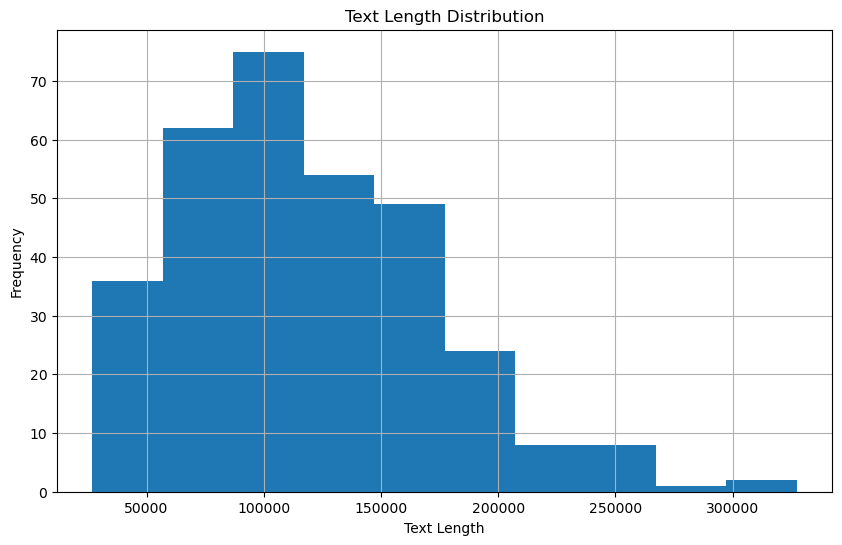

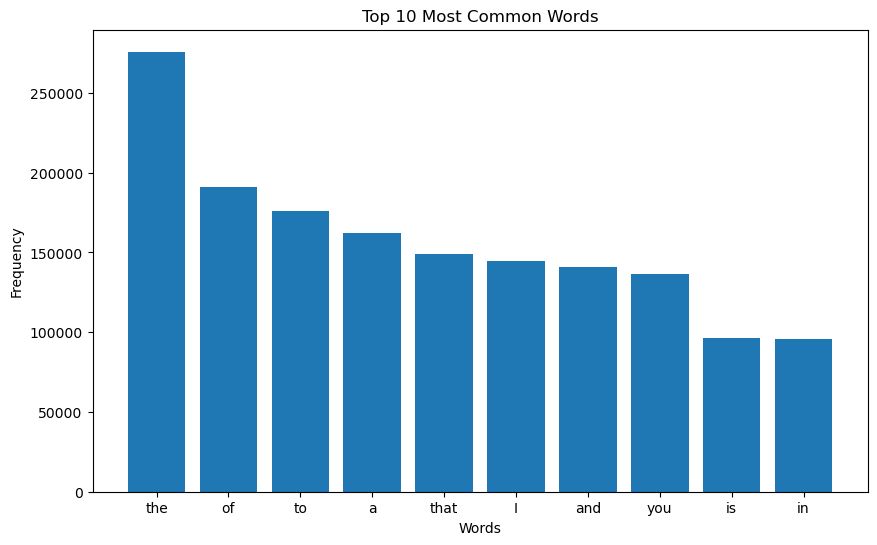

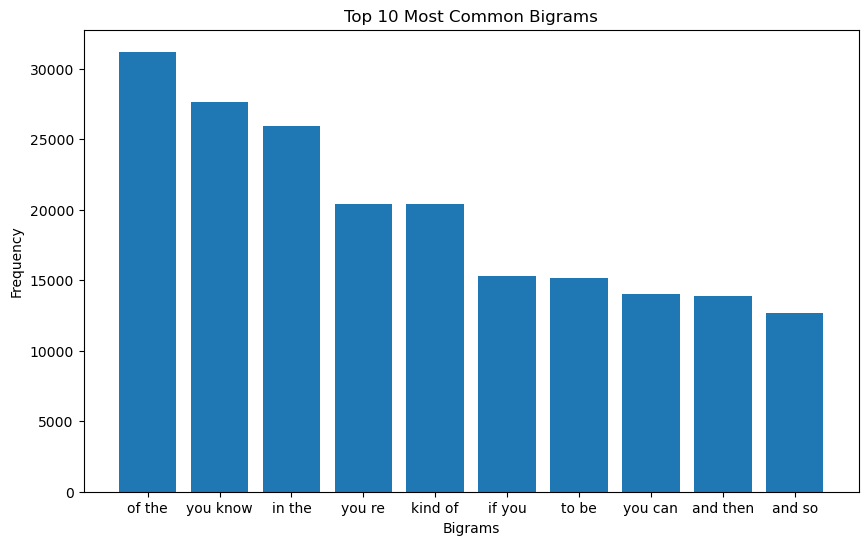

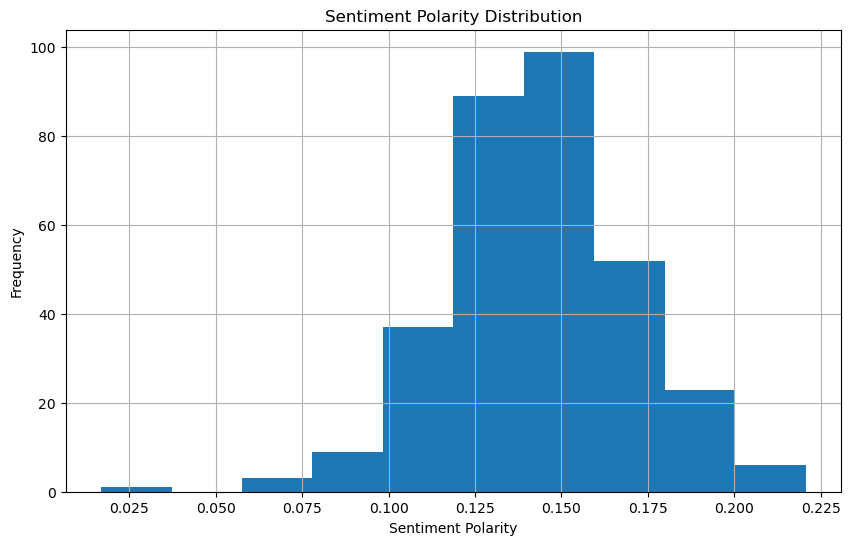

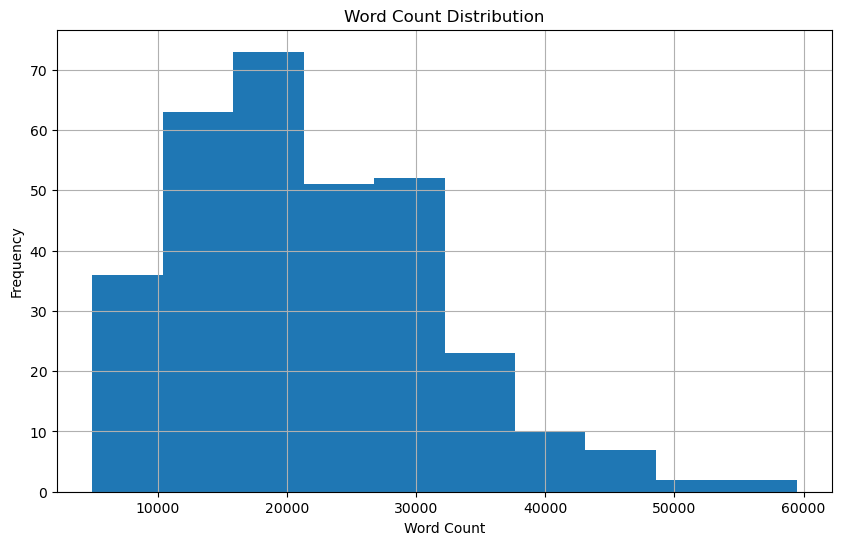

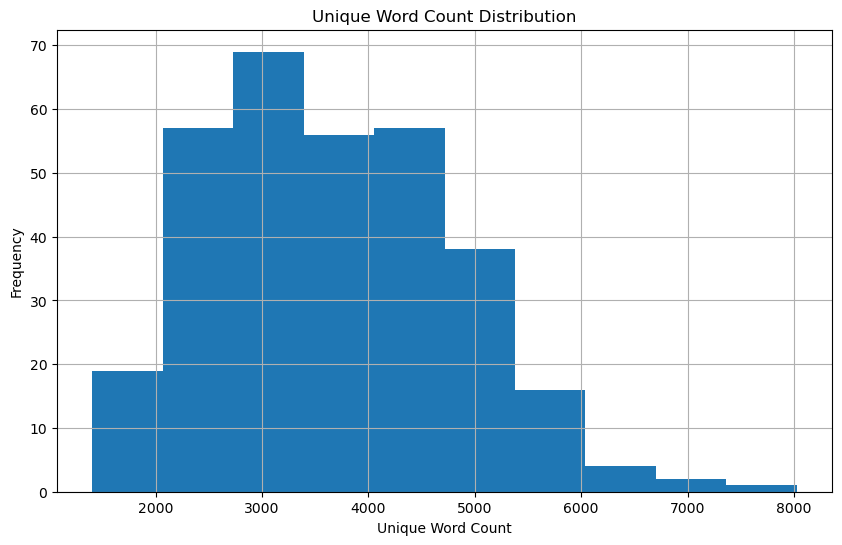

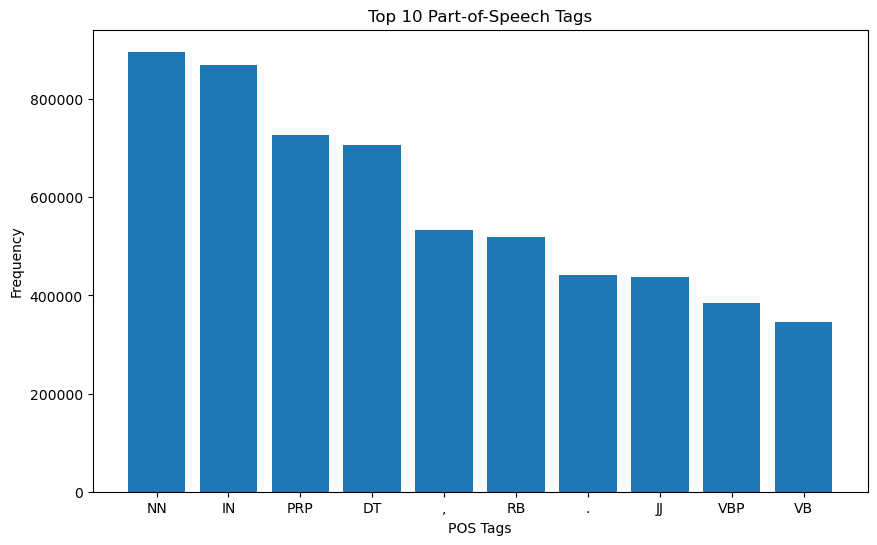

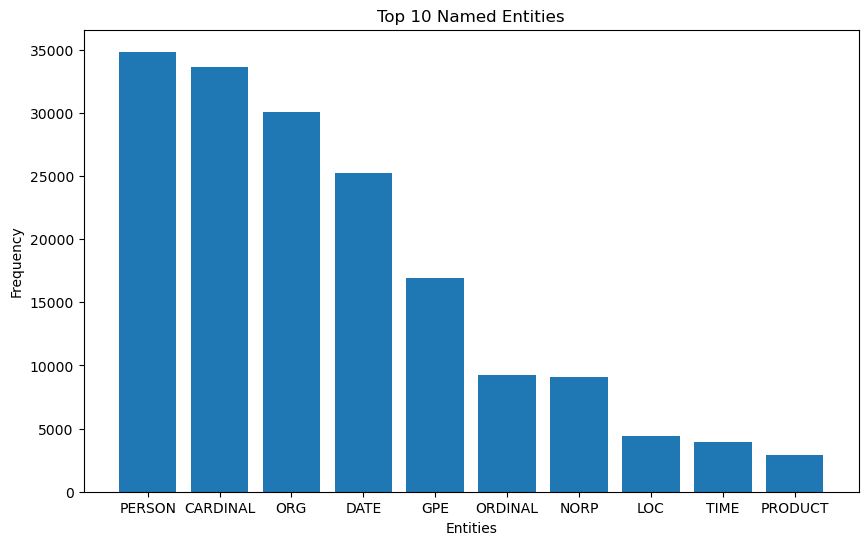

In [67]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import nltk
import spacy

# Download necessary NLTK data
nltk.download('averaged_perceptron_tagger')

# Load Spacy model
nlp = spacy.load("en_core_web_sm")

def draw_word_cloud(df, title):
    # Combine all text data into a single string
    text = ' '.join(df.astype(str).values.flatten())
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

def perform_eda(df, text_column):
    # Descriptive Statistics
    print("Descriptive Statistics:")
    print(df.describe())
    print("\n")

    # Missing Values Analysis
    print("Missing Values Analysis:")
    print(df.isnull().sum())
    print("\n")

    # Distribution Plots
    df['text_length'] = df[text_column].apply(len)
    plt.figure(figsize=(10, 6))
    df['text_length'].hist()
    plt.title('Text Length Distribution')
    plt.xlabel('Text Length')
    plt.ylabel('Frequency')
    plt.show()

    # Frequency Distribution of Words
    word_counts = Counter(" ".join(df[text_column]).split())
    common_words = word_counts.most_common(10)
    words, counts = zip(*common_words)
    plt.figure(figsize=(10, 6))
    plt.bar(words, counts)
    plt.title('Top 10 Most Common Words')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.show()

    # N-grams Analysis
    vectorizer = CountVectorizer(ngram_range=(2, 2))
    ngrams = vectorizer.fit_transform(df[text_column])
    ngrams_sum = ngrams.sum(axis=0)
    ngrams_freq = [(word, ngrams_sum[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    ngrams_freq = sorted(ngrams_freq, key=lambda x: x[1], reverse=True)[:10]
    ngrams, counts = zip(*ngrams_freq)
    plt.figure(figsize=(10, 6))
    plt.bar(ngrams, counts)
    plt.title('Top 10 Most Common Bigrams')
    plt.xlabel('Bigrams')
    plt.ylabel('Frequency')
    plt.show()

    # Sentiment Analysis
    df['sentiment'] = df[text_column].apply(lambda x: TextBlob(x).sentiment.polarity)
    plt.figure(figsize=(10, 6))
    df['sentiment'].hist()
    plt.title('Sentiment Polarity Distribution')
    plt.xlabel('Sentiment Polarity')
    plt.ylabel('Frequency')
    plt.show()

    # Word Count
    df['word_count'] = df[text_column].apply(lambda x: len(x.split()))
    plt.figure(figsize=(10, 6))
    df['word_count'].hist()
    plt.title('Word Count Distribution')
    plt.xlabel('Word Count')
    plt.ylabel('Frequency')
    plt.show()

    # Unique Words Count
    df['unique_word_count'] = df[text_column].apply(lambda x: len(set(x.split())))
    plt.figure(figsize=(10, 6))
    df['unique_word_count'].hist()
    plt.title('Unique Word Count Distribution')
    plt.xlabel('Unique Word Count')
    plt.ylabel('Frequency')
    plt.show()

    # Part-of-Speech Tagging
    df['pos_tags'] = df[text_column].apply(lambda x: nltk.pos_tag(nltk.word_tokenize(x)))
    pos_counts = Counter([tag for sublist in df['pos_tags'] for _, tag in sublist])
    pos_tags, counts = zip(*pos_counts.most_common(10))
    plt.figure(figsize=(10, 6))
    plt.bar(pos_tags, counts)
    plt.title('Top 10 Part-of-Speech Tags')
    plt.xlabel('POS Tags')
    plt.ylabel('Frequency')
    plt.show()

    # Named Entity Recognition (NER)
    df['entities'] = df[text_column].apply(lambda x: [(ent.text, ent.label_) for ent in nlp(x).ents])
    entity_counts = Counter([label for sublist in df['entities'] for _, label in sublist])
    entities, counts = zip(*entity_counts.most_common(10))
    plt.figure(figsize=(10, 6))
    plt.bar(entities, counts)
    plt.title('Top 10 Named Entities')
    plt.xlabel('Entities')
    plt.ylabel('Frequency')
    plt.show()

podcast_eda_results = perform_eda(podcast_df, 'text')
podcast_eda_results

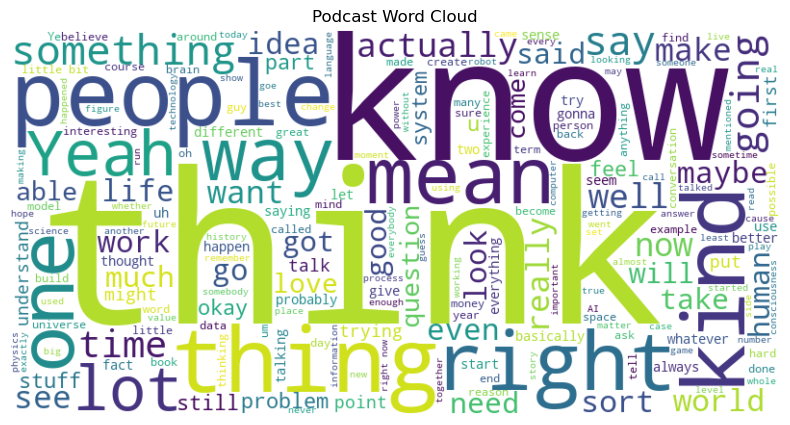

In [68]:
draw_word_cloud(podcast_df['text'], 'Podcast Word Cloud')

# Pre Processing

In [69]:
import nltk
import nltk.corpus
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Convert the tokens to lowercase
    tokens = [word.lower() for word in tokens]
    
    # Remove punctuation and numbers
    words = [word for word in tokens if word.isalpha()]
    
    # Filter out stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if not word in stop_words]
    
    # Join the words back into a single string
    text = ' '.join(words)
    
    return text

podcast_df['clean_text'] = podcast_df['text'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /Users/pparks/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pparks/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [71]:
podcast_df.head()

,text,text_length,sentiment,word_count,unique_word_count,pos_tags,entities,clean_text
0,"As part of MIT course 6S099, Artificial Genera...",74068,0.171118,13424,2726,"[(As, IN), (part, NN), (of, IN), (MIT, NNP), (...","[(MIT, ORG), (Artificial General Intelligence,...",part mit course artificial general intelligenc...
1,As part of MIT course 6S099 on artificial gene...,57788,0.116574,10217,2474,"[(As, IN), (part, NN), (of, IN), (MIT, NNP), (...","[(MIT, ORG), (Christoph Koch, PERSON), (the Al...",part mit course artificial general intelligenc...
2,"You've studied the human mind, cognition, lang...",33940,0.106534,5989,1762,"[(You, PRP), ('ve, VBP), (studied, VBN), (the,...","[(Plato, ORG), (B., NORP), (Nietzsche, ORG), (...",studied human mind cognition language vision e...
3,What difference between biological neural netw...,34228,0.106092,5993,1528,"[(What, WP), (difference, NN), (between, IN), ...","[(First, ORDINAL), (One, CARDINAL), (RNN, ORG)...",difference biological neural networks artifici...
4,The following is a conversation with Vladimir ...,36171,0.125654,6374,1481,"[(The, DT), (following, NN), (is, VBZ), (a, DT...","[(Vladimir Vapnik, PERSON), (VC, PERSON), (the...",following conversation vladimir vapnik co inve...


# Store dataset for model training

In [ ]:
# store the datasets for model training
dataset_path = "datasets"
os.makedirs(dataset_path, exist_ok=True)

podcast_df.to_csv(dataset_path + "/podcast.csv", index=False)
# ted_talk_df.to_csv(dataset_path + "/ted_talk.csv", index=False)
# cnn_df.to_csv(dataset_path + "/cnn.csv", index=False)